### We are working on fetal health dataset, We have to classify the fetal health feature with values 0, 1, 2. 
### Proposed algorithms are:- 1. K-nearest neighbors, 2. Random Forest 3. Artificial Neural Network

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
#Importing required libraries
import pandas as pd
import numpy as np
import tensorflow.keras as keras
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_curve, log_loss
import matplotlib.pyplot as plt 
import seaborn as sns

In [27]:
#Reading the dataset
df = pd.read_csv("/content/drive/MyDrive/Tasks/task(ICA)/fetal_health.csv")
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


### Let's see how much data we have

In [28]:
df.shape

(2126, 22)

##### This shows we have 2126 samples and 22 features describing them

Our dataset contains 22 columns/features including target feature

### Let's have some information about the dataset  
### **Exploratory Data Analysis**

### Some Attributes information
- baseline value: Baseline Fetal Heart Rate (FHR)
- accelerations: Number of accelerations per second
- fetal_movement: Number of fetal movements per second
- uterine_contractions: Number of uterine contractions per second
- light_decelerations: Number of LDs per second
- severe_decelerations: Number of SDs per second
- prolongued_decelerations: Number of PDs per second
- abnormal_short_term_variability: Percentage of time with abnormal short term variability
-mean_value_of_short_term_variability:Mean value of short term variability
-percentage_of_time_with_abnormal_long_term_variability: Percentage of time with abnormal long term variability, etc

In [29]:
#Accessing information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

##### This represents, our dataset does not have any object type feature, therefore, we will not require any kind of encoding

### Let's have some statistical info about the dataset; mean, total samples count, min & max values, etc.

In [30]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,8.187629,70.445908,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,5.628247,38.955693,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,4.600000,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,7.400000,67.500000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,10.800000,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,50.700000,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


##### A brief description about dataset shown above describes that we do not have any missing values as all features have equal value count i.e., 2126.

##### The above describe method tells us that as mean and 50% are nearly same for each column the dataset doesn't have any significant outliers

In [31]:
#unique values in our target feature
df['fetal_health'].nunique()

3

This tells us that target variable in descrete and and categorical in nature.

Let's visualize how much data we have, belonging to each class

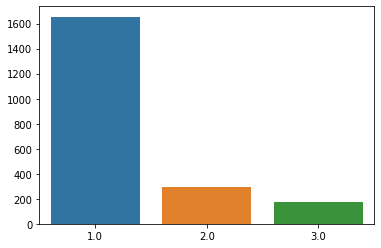

In [32]:
sns.barplot(x = np.sort(df['fetal_health'].unique()), y = df['fetal_health'].value_counts().values)

#### Above plot shows, most of the data belongs to class 1, then 2 and comparatively less belongs to class 3 


#### Another plot visualizing the same as above

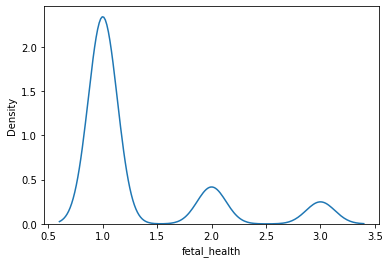

In [33]:
sns.kdeplot(x = df['fetal_health'])

#### This also shows that most of the target variable belongs to class 1

#### For covenience, let's check if our dataset has any missing/na value

In [34]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

##### This shows we have no null values present in the dataset. Our data is cleaned and noise free, therefore, it does not require any type of data cleaning techniques like missing values treatment or outlier treatment.


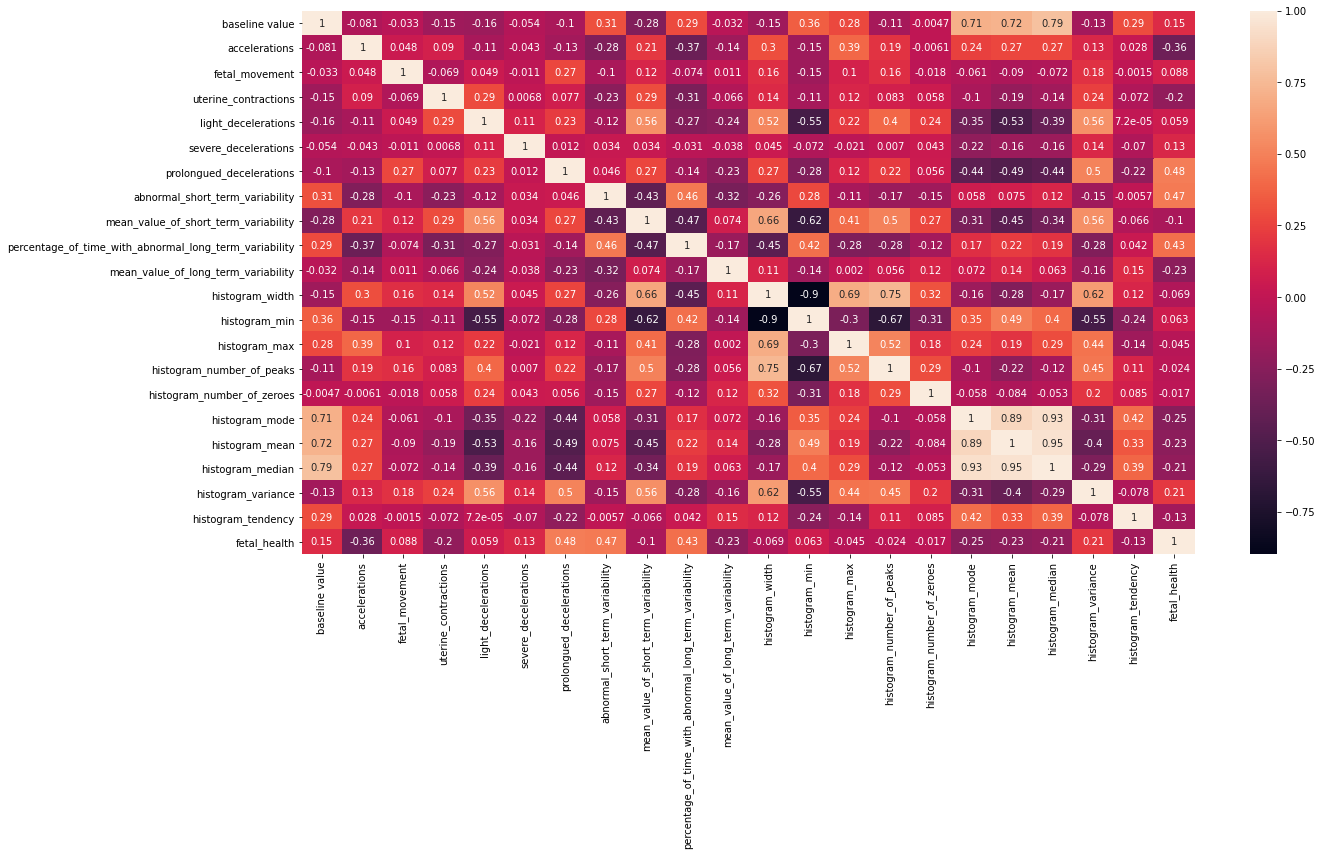

In [35]:
#Visualising the correlation of features with other features in the dataset
fig = plt.figure(figsize=(20,10))
corr = sns.heatmap(df.corr(), annot=True)

##### This describes the correlation between each feature with other features as well as target feature.

##### The dataset have correlated features which are not useful for our model dark squares in the above map shows positive correlation and light squares shows negetive correlation. It is a good preactice to apply feature reduction like PCA to remove correlated data.

#### Let's explore some other features as well


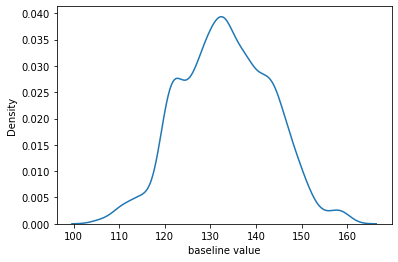

In [36]:
sns.kdeplot(x = df['baseline value'])

##### The above graph shows that the baseline feature is normalised

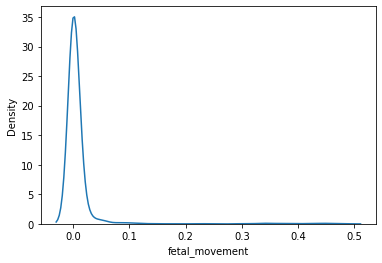

In [37]:
sns.kdeplot(x = df['fetal_movement'])

##### fetal movement feature is not normalised. The tail of kde plot is skewed rightwards, therefore it is positively skewed.

### Data Preprocessing
It is needed to inhance accuracy

In [38]:
#Preparing the dataset for applying in the model

#Splitting the dataset into training and validation data
X = df.drop("fetal_health", axis=1)
Y = df['fetal_health']
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, random_state=101, test_size=0.3)

#Feature Scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

#Feature reduction
pca = PCA()
pca = pca.fit(X_train, Y_train)

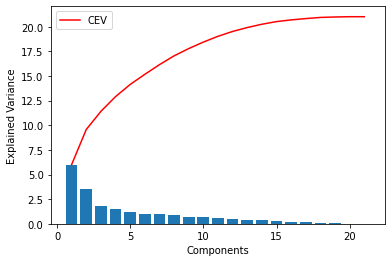

In [39]:
plt.bar(range(1,len(pca.explained_variance_)+1),pca.explained_variance_)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.plot(range(1,len(pca.explained_variance_)+1), np.cumsum(pca.explained_variance_), c='red', label='CEV')
plt.legend(loc='upper left')
plt.show()

This plot shows the principle components with their corresponding explained variance score which is helpful in determining the important components to be choosen off.

In [40]:
X_train = pca.transform(X_train)
X_val = pca.transform(X_val)

#### Model1: K Nearest Neighbors Classifier

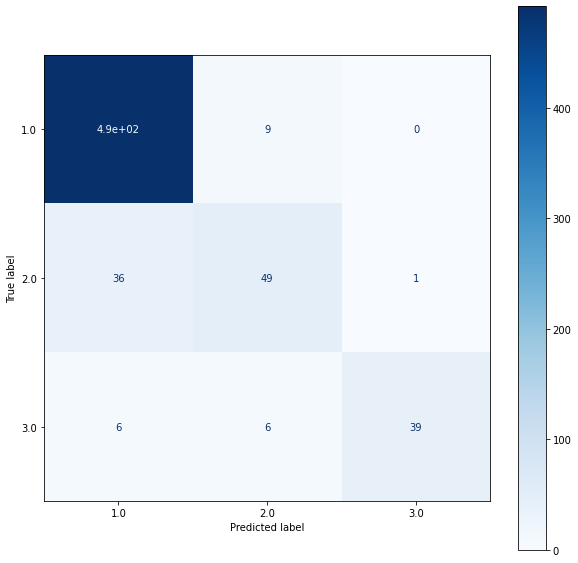

In [41]:
#Applying the K-nearest neighbor algorithm
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, Y_train)
prediction = model.predict(X_val)

fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(model, X_val, Y_val, ax=ax, cmap='Blues')

Above confusion matrix shows some true positives as well as false positive values.
### Some other performance measures for KNN classifier

In [42]:
log_loss(Y_val, model.predict_proba(X_val))

0.23556809205149612

In [43]:
print('------------Classification report--------------- ')
print(classification_report(Y_val, prediction))
acc2 = (accuracy_score(Y_val, prediction))
print("f1-score: ", f1_score(Y_val, prediction, average='macro'))

------------Classification report--------------- 
              precision    recall  f1-score   support

         1.0       0.92      0.98      0.95       501
         2.0       0.77      0.57      0.65        86
         3.0       0.97      0.76      0.86        51

    accuracy                           0.91       638
   macro avg       0.89      0.77      0.82       638
weighted avg       0.90      0.91      0.90       638

f1-score:  0.8204002760524499


This model is showing 0.82 score in classification with the accuracy of 0.91

### Random forest Classification 

----------------Confusion Matrix-------------------


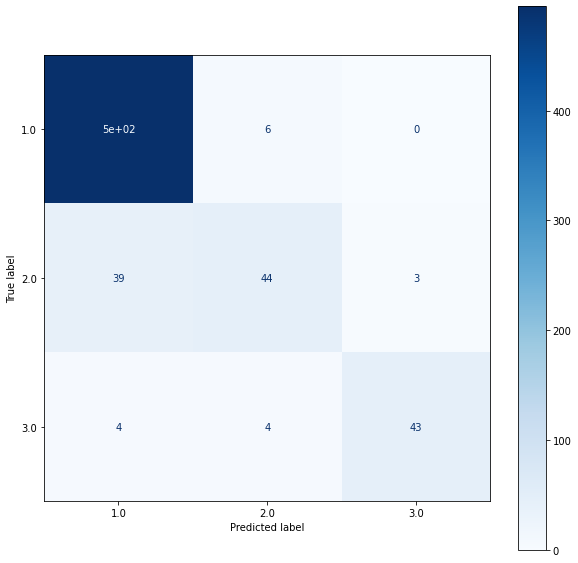

In [44]:
#Applying the Random Forest algorithm
model = RandomForestClassifier(n_estimators=50)
model.fit(X_train, Y_train)
prediction = model.predict(X_val)

print('----------------Confusion Matrix-------------------')
fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(model, X_val, Y_val, ax=ax, cmap='Blues')

This confusion matrix shows comparatively lesser False negatives as comparared to KNN classifier.

In [45]:
log_loss(Y_val, model.predict_proba(X_val))

0.21091169026092327

In [46]:
print('------------Classification report--------------- ')
print(classification_report(Y_val, prediction))
acc1 = (accuracy_score(Y_val, prediction))
print("f1-score: ", f1_score(Y_val, prediction, average='macro'))

------------Classification report--------------- 
              precision    recall  f1-score   support

         1.0       0.92      0.99      0.95       501
         2.0       0.81      0.51      0.63        86
         3.0       0.93      0.84      0.89        51

    accuracy                           0.91       638
   macro avg       0.89      0.78      0.82       638
weighted avg       0.91      0.91      0.90       638

f1-score:  0.8226695450810629


This model is showing approx. 0.85 F1-score in classification with the accuracy of 0.92 which is comparatively better than Knn Classifier.

### Artificial Neural Network 

In [47]:
#Applying Artificial neural network
model = keras.models.Sequential()
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
ArtificialNeuralNetwork=model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=70, callbacks=[stop_early])

Epoch 1/70
47/47 [==============================] - 1s 7ms/step - loss: 0.0000e+00 - accuracy: 0.4730 - val_loss: 0.0000e+00 - val_accuracy: 0.7837
Epoch 2/70
47/47 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.7992 - val_loss: 0.0000e+00 - val_accuracy: 0.7853
Epoch 3/70
47/47 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.7872 - val_loss: 0.0000e+00 - val_accuracy: 0.7853
Epoch 4/70
47/47 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.7612 - val_loss: 0.0000e+00 - val_accuracy: 0.7853
Epoch 5/70
47/47 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.7641 - val_loss: 0.0000e+00 - val_accuracy: 0.7853
Epoch 6/70
47/47 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.7865 - val_loss: 0.0000e+00 - val_accuracy: 0.7853


The ANN is having negligible loss in training as well as validation and showing the accuracy of approx 78%. As the loss in minimum, this model is better.

### Visualising the training duration of artificial neural network

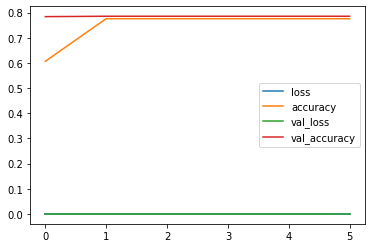

In [48]:
pd.DataFrame(ArtificialNeuralNetwork.history).plot()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


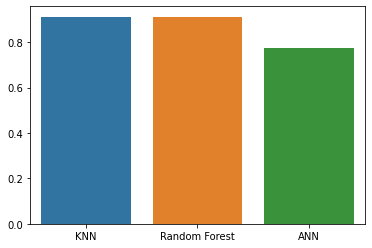

In [49]:
#Visualising and comparing the accuracy of the proposed algorithms
names = ['KNN', 'Random Forest', 'ANN']
values = [acc2, acc1, ArtificialNeuralNetwork.history['accuracy'][-1]]
bar = sns.barplot(names, values)

## CONCLUSION




#### Observing the above plot, showing the comparison of models' accuracy, it can be concluded that Random Forest classifier worked better as compared to the other two. But, we have also observed that in KNN and Random forest Classifier, the confusion matrix has shown some false negatives results which may have some loss values also whereas we have observed that the ANN has negligible loss values.
#### **Therefore, ANN can be chosen for classification for this dataset. The Second algorithm, for compatability, can be Random Forest Classifier as it is having a log-loss lower than KNN classifier.**